In [ ]:
from __future__ import print_function

import mxnet as mx
import mxnet.ndarray as nd
from mxnet import nd, autograd, gluon
from mxnet.gluon.data.vision import transforms

ctx = mx.gpu() if mx.context.num_gpus() else mx.cpu()

In [ ]:
!pip install autogluon
!pip install mxnet --upgrade
!pip install dask --upgrade

# Uninstall mkl for faster neural-network training time
!pip uninstall -y mkl
# Upgrade pip to ensure the latest package versions are available
!pip install -U pip
!pip install -U "mxnet<2.0.0"
!pip install autogluon
!pip install -U ipykernel

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
np.random.seed(111)

In [2]:
df = pd.read_csv('processed_text.csv')
df = df.dropna()


,Grade,Text,lemmatized,grammarized
0,1.0,I had just gone to Chobot Space and Science Ce...,i have just go to chobot space and science cen...,I had just gone to + chobot + space and + scie...
1,1.0,My cat is fluffy. His name is Buzz. He is my f...,my cat be fluffy his name be buzz he be my fav...,+ my cat is fluffy . + his name is + buzz . + ...
2,1.0,Spring is sweet because we can go boat riding ...,spring be sweet because we can go boat riding ...,+ spring is sweet because we can go boat ridin...
3,1.0,One day baby Josh came home. He was in a yello...,one day baby josh come home he be in a yellow ...,+ one day baby + josh came home . + he was in ...
4,1.0,One time I went to Mexico. It was a blast! I m...,one time i go to mexico it be a blast i meet p...,+ one time I went to + mexico . + it was a bla...
...,...,...,...,...
317,10.0,The modern world is full of problems and issue...,the modern world be full of problem and issue ...,+ the modern world is full of problems and iss...
318,10.0,The violin is arguably the most cherished and ...,the violin be arguably the most cherished and ...,+ the violin is arguably the most cherished an...
319,10.0,Have you ever wondered how to design complex w...,have you ever wonder how to design complex woo...,+ have you ever wondered how to design complex...
320,10.0,Welding is a highly demanded trade across the ...,welding be a highly demanded trade across the ...,+ welding is a highly demanded trade across th...


In [5]:
randindx = np.random.permutation(np.arange(len(df)))
train_df = df.iloc[randindx[:int(len(randindx)*.8)]]
test_df = df.iloc[randindx[len(train_df):]]
errors = test_df.copy()


ERROR: distributed 2021.1.1 has requirement dask>=2020.12.0, but you'll have dask 2.12.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
ERROR: botocore 1.19.59 has requirement urllib3<1.27,>=1.25.4; python_version != "3.4", but you'll have urllib3 1.24.3 which is incompatible.
I

NumPy-shape semantics has been activated in your code. This is required for creating and manipulating scalar and zero-size tensors, which were not supported in MXNet before, as in the official NumPy library. Please DO NOT manually deactivate this semantics while using `mxnet.numpy` and `mxnet.numpy_extension` modules.
2021-01-23 23:10:36,028 - root - INFO - All Logs will be saved to ./ag_text/ag_text_prediction.log
2021-01-23 23:10:36,040 - root - INFO - Train Dataset:
2021-01-23 23:10:36,041 - root - INFO - Columns:

- Text(
   name="Text"
   #total/missing=205/0
   length, min/avg/max=25/2002.47/13694
)
- Numerical(
   name="Grade"
   #total/missing=205/0
   shape=()
)


2021-01-23 23:10:36,042 - root - INFO - Tuning Dataset:
2021-01-23 23:10:36,043 - root - INFO - Columns:

- Text(
   name="Text"
   #total/missing=52/0
   length, min/avg/max=44/2435.88/11316
)
- Numerical(
   name="Grade"
   #total/missing=52/0
   shape=()
)


2021-01-23 23:10:36,044 - root - INFO - Label columns=['

100%|██████████| 472/472 [00:00<00:00, 209kiB/s]


100%|██████████| 323k/323k [00:00<00:00, 785kiB/s]


100%|██████████| 53.9M/53.9M [00:02<00:00, 24.6MiB/s]
100%|██████████| 24/24 [13:48<00:00, 34.52s/it]


100%|██████████| 24/24 [13:51<00:00, 34.65s/it]


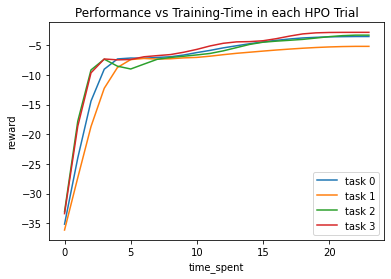

OrderedDict([('mae', 1.3968673872259947)])


,Grade,Text,lemmatized,grammarized,Text Prediction
168,9.0,Mamas stitches color me like dark crayons stri...,mama stitch color me like dark crayon strike p...,+ mamas stitches color me like dark crayons st...,4.131336
42,4.0,Sloppy Joes are my favorite food; Once I eat o...,sloppy joes be my favorite food once i eat one...,+ sloppy + joes are my favorite food ; + once ...,4.123634
202,8.0,That one day little black boys and black girls...,that one day little black boy and black girl w...,+ that one day little black boys and black gir...,8.159014
91,2.0,Back-hand-springs Wow! I was doing my back-han...,back hand spring wow i be do my back hand spri...,+ back - hand - springs + wow ! I was doing my...,5.020030
299,4.0,"One quiet, Tuesday morning, I woke up to a pai...",one quiet tuesday morning i wake up to a pair ...,"+ one quiet , + tuesday morning , I woke up to...",5.504687
...,...,...,...,...,...
118,5.0,On a dark December night in 1776 as he led a ...,on a dark december night in a he lead a barefo...,+ on a dark + december night in 1776 as he led...,5.474358
169,9.0,Weasel with a knee brace sits at a table wit...,weasel with a knee brace sits at a table with ...,+ weasel with a knee brace sits at a table wit...,3.334751
275,2.0,Dear Mr. Davis: You should serve chocolate mil...,dear mr davis you should serve chocolate milk ...,+ dear + mr . + davis : + you should serve cho...,2.771630
86,1.0,I got E-mail from the president on Aug. 29 199...,i get e mail from the president on aug the tim...,I got E - mail from the president on + aug . 2...,2.999924


In [6]:

# from autogluon import TextPrediction as task
# predictor = task.fit(train_df[['Text','Grade']], label='Grade',
#                      seed=111
#                     )
print(predictor.evaluate(test_df[['Text','Grade']], metrics=['mae']))
yhat = predictor.predict({'Text':[text for text in test_df.Text]})
errors['Text Prediction'] = yhat
errors

In [7]:
predictor2 = task.fit(train_df[['grammarized','Grade']], label='Grade',
                     seed=111
                    )
print(predictor2.evaluate(test_df[['grammarized','Grade']], metrics=['mae']))
yhat = predictor2.predict({'grammarized':[text for text in test_df.grammarized]})
errors['Grammarized Prediction'] = yhat
errors

2021-01-24 00:06:55,814 - root - INFO - All Logs will be saved to ./ag_text/ag_text_prediction.log
2021-01-24 00:06:55,830 - root - INFO - Train Dataset:
2021-01-24 00:06:55,832 - root - INFO - Columns:

- Text(
   name="grammarized"
   #total/missing=205/0
   length, min/avg/max=27/2157.18/14326
)
- Numerical(
   name="Grade"
   #total/missing=205/0
   shape=()
)


2021-01-24 00:06:55,834 - root - INFO - Tuning Dataset:
2021-01-24 00:06:55,837 - root - INFO - Columns:

- Text(
   name="grammarized"
   #total/missing=52/0
   length, min/avg/max=116/2267.96/12586
)
- Numerical(
   name="Grade"
   #total/missing=52/0
   shape=()
)


2021-01-24 00:06:55,839 - root - INFO - Label columns=['Grade'], Feature columns=['grammarized'], Problem types=['regression'], Label shapes=[()]
2021-01-24 00:06:55,842 - root - INFO - Eval Metric=mse, Stop Metric=mse, Log Metrics=['mse', 'rmse', 'mae']


 79%|███████▉  | 19/24 [10:51<02:50, 34.05s/it]

KeyboardInterrupt: ignored

In [ ]:
predictor3 = task.fit(train_df[['lemmatized','Grade']], label='Grade',
                     seed=111
                    )
print(predictor3.evaluate(test_df[['lemmatized','Grade']], metrics=['mae']))
yhat = predictor3.predict({'lemmatized':[text for text in test_df.Text]})
errors['Lemmatized Prediction'] = yhat
errors

In [ ]:
errors = errors.iloc[:,[1,2,3,0,4,5]]
errors

In [9]:
predictor.export('TextModel')

AttributeError: ignored

In [ ]:
net.export("lenet", epoch=1)


In [ ]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    deserialized_net = gluon.nn.SymbolBlock.imports("lenet-symbol.json", ['data'], "lenet-0001.params", ctx=ctx)
